In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import lab2rgb
from skimage.color import rgb2lab
import sys


# representative RGB colours for each label, for nice display
COLOUR_RGB = {
    'red': (255, 0, 0),
    'orange': (255, 114, 0),
    'yellow': (255, 255, 0),
    'green': (0, 230, 0),
    'blue': (0, 0, 255),
    'purple': (187, 0, 187),
    'brown': (117, 60, 0),
    'pink': (255, 187, 187),
    'black': (0, 0, 0),
    'grey': (150, 150, 150),
    'white': (255, 255, 255),
}
name_to_rgb = np.vectorize(COLOUR_RGB.get, otypes=[np.uint8, np.uint8, np.uint8])


def plot_predictions(model, lum=71, resolution=256):
    """
    Create a slice of LAB colour space with given luminance; predict with the model; plot the results.
    """
    wid = resolution
    hei = resolution
    n_ticks = 5

    # create a hei*wid grid of LAB colour values, with L=lum
    ag = np.linspace(-100, 100, wid)
    bg = np.linspace(-100, 100, hei)
    aa, bb = np.meshgrid(ag, bg)
    ll = lum * np.ones((hei, wid))
    lab_grid = np.stack([ll, aa, bb], axis=2)

    # convert to RGB for consistency with original input
    X_grid = lab2rgb(lab_grid)

    # predict and convert predictions to colours so we can see what's happening
    y_grid = model.predict(X_grid.reshape((wid*hei, 3)))
    pixels = np.stack(name_to_rgb(y_grid), axis=1) / 255
    pixels = pixels.reshape((hei, wid, 3))

    # plot input and predictions
    plt.figure(figsize=(10, 5))
    plt.suptitle('Predictions at L=%g' % (lum,))
    plt.subplot(1, 2, 1)
    plt.title('Inputs')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.ylabel('B')
    plt.imshow(X_grid.reshape((hei, wid, 3)))

    plt.subplot(1, 2, 2)
    plt.title('Predicted Labels')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.imshow(pixels)

In [23]:
colourData=pd.read_csv("colour-data.csv")
X = colourData[['R', 'G', 'B']].values / 255
y = colourData['Label'].values

# Check shape of arrays
print(X.shape, y.shape)

# Split data into training and validation set
from sklearn.model_selection import train_test_split
number = 42
X_train, X_remainder, y_train, y_remainder = train_test_split(X, y, random_state=number, test_size =
0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_remainder, y_remainder, random_state=number,
test_size = 0.5)


(3950, 3) (3950,)


0.6925675675675675
0.6998313659359191


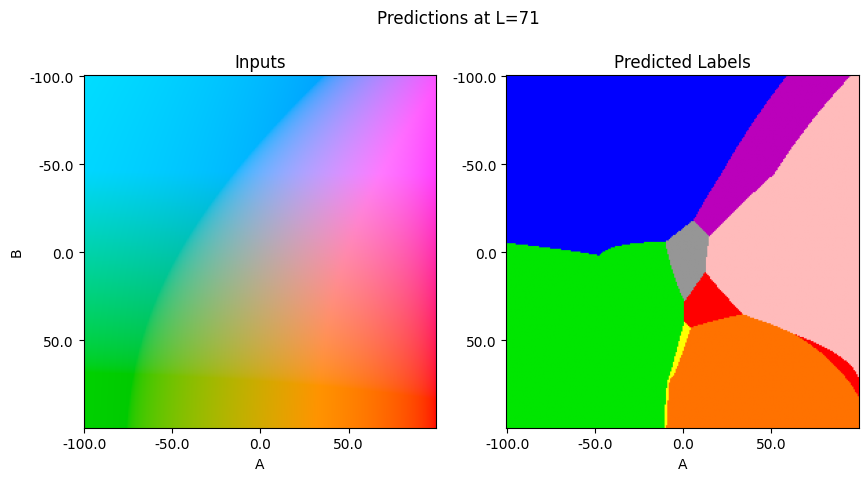

In [24]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
model_rbg = LogisticRegression()
model_rbg.fit(X_train, y_train)

# Validation score
print(model_rbg.score(X_valid, y_valid))

# Test score
print(model_rbg.score(X_test, y_test))

# Plot predictions
plot_predictions(model_rbg)

In [25]:
from sklearn.metrics import classification_report
y_pred = model_rbg.predict(X_valid)
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

       black       0.70      0.87      0.77        61
        blue       0.86      0.74      0.79        99
       brown       0.64      0.24      0.35        29
       green       0.73      0.96      0.83       127
        grey       0.49      0.53      0.51        49
      orange       0.75      0.40      0.52        15
        pink       0.50      0.68      0.58        38
      purple       0.72      0.80      0.76        95
         red       0.50      0.30      0.38        50
       white       0.00      0.00      0.00        10
      yellow       1.00      0.32      0.48        19

    accuracy                           0.69       592
   macro avg       0.63      0.53      0.54       592
weighted avg       0.69      0.69      0.67       592



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

def makelab(X): # Convert RGB to LAB
    X = X.reshape(1, -1, 3)
    lab = rgb2lab(X)
    return lab.reshape(-1, 3)

0.7212837837837838
0.7318718381112985
              precision    recall  f1-score   support

       black       0.70      0.87      0.77        61
        blue       0.86      0.74      0.79        99
       brown       0.64      0.24      0.35        29
       green       0.73      0.96      0.83       127
        grey       0.49      0.53      0.51        49
      orange       0.75      0.40      0.52        15
        pink       0.50      0.68      0.58        38
      purple       0.72      0.80      0.76        95
         red       0.50      0.30      0.38        50
       white       0.00      0.00      0.00        10
      yellow       1.00      0.32      0.48        19

    accuracy                           0.69       592
   macro avg       0.63      0.53      0.54       592
weighted avg       0.69      0.69      0.67       592



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


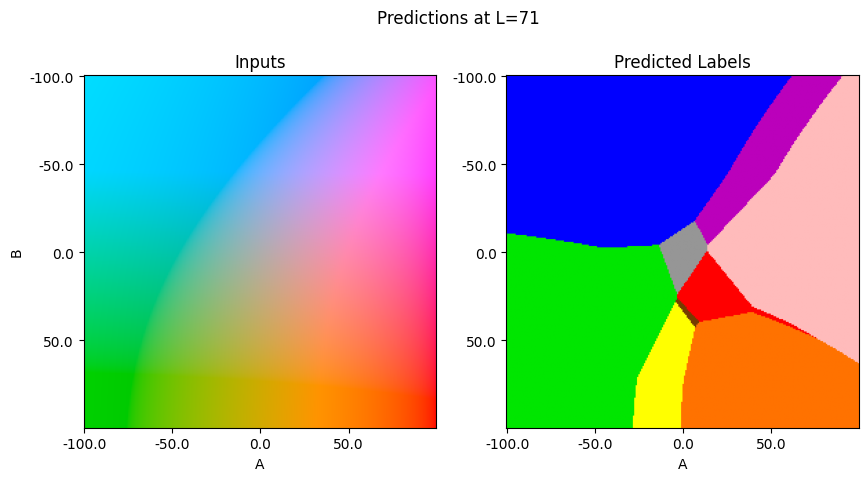

In [27]:
model_lab = make_pipeline( # Create pipeline
    FunctionTransformer(makelab),
    LogisticRegression(max_iter=10000)
)

model_lab.fit(X_train, y_train)
print(model_lab.score(X_valid, y_valid))
print(model_lab.score(X_test, y_test))

plot_predictions(model_lab)

print(classification_report(y_valid,y_pred))

0.01 0.6857142857142857
0.7246621621621622
0.730185497470489
              precision    recall  f1-score   support

       black       0.81      0.84      0.82        61
        blue       0.82      0.75      0.78        99
       brown       0.69      0.31      0.43        29
       green       0.85      0.92      0.88       127
        grey       0.48      0.73      0.58        49
      orange       0.73      0.53      0.62        15
        pink       0.60      0.79      0.68        38
      purple       0.76      0.80      0.78        95
         red       0.42      0.32      0.36        50
       white       0.00      0.00      0.00        10
      yellow       0.86      0.63      0.73        19

    accuracy                           0.72       592
   macro avg       0.64      0.60      0.61       592
weighted avg       0.72      0.72      0.71       592



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


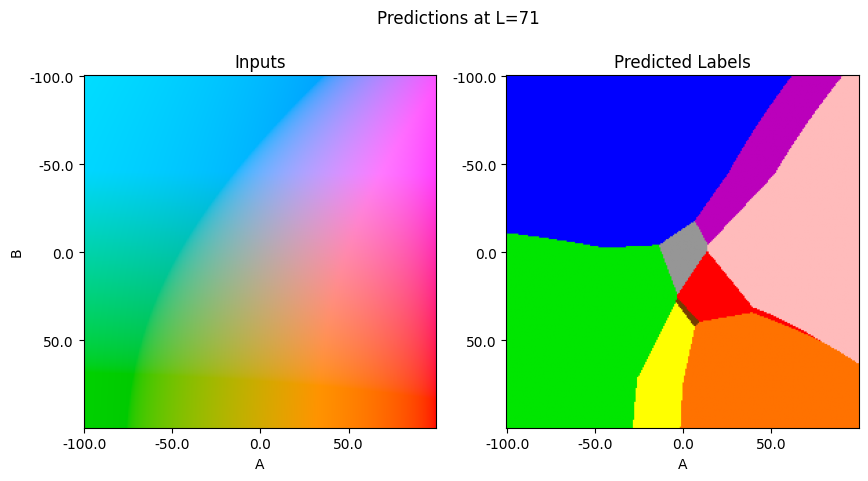

In [28]:
# Initialise kfold
from sklearn.model_selection import KFold, cross_val_score
C_val = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

kf = KFold(n_splits=5, shuffle=True, random_state=number)

# Create empty lists to store scores
scores = []

# Loop through each fold
for C in C_val:
    model_lab = make_pipeline(
        FunctionTransformer(makelab),
        LogisticRegression(max_iter=10000, C=C)
    )
    fold_scores = cross_val_score(model_lab, X_train, y_train, cv=kf)
    scores.append(fold_scores)

# Calculate mean scores for each C value
mean_scores = [np.mean(s) for s in scores]
c_lab = C_val[np.argmax(mean_scores)]
score_lab = np.max(mean_scores)

print(c_lab, score_lab)

final_model = make_pipeline(
    FunctionTransformer(makelab),
    LogisticRegression(max_iter=10000, C=c_lab)
)

final_model.fit(X_train, y_train)
print(final_model.score(X_valid, y_valid))
print(final_model.score(X_test, y_test))

plot_predictions(final_model)

y_pred = final_model.predict(X_valid)
print(classification_report(y_valid,y_pred))

